In [2]:
import os
import cv2
import random
import shutil

# Dataset yolunu belirtin
dataset_path = "D:/gorsel/train/train"  # 'train' klasörünün yolu

# Yeni klasörler oluşturulacak
output_dir_original = 'output_original_images'
output_dir_processed = 'output_processed_images'

# Görüntü boyutu (işlenmiş görseller için)
target_size = (224, 224)

# Eğer klasörler yoksa oluştur
os.makedirs(output_dir_original, exist_ok=True)
os.makedirs(output_dir_processed, exist_ok=True)

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Her kategori için işlem
for category in categories:
    # Kategoriye özel dizinler oluştur
    category_original_dir = os.path.join(output_dir_original, category)
    category_processed_dir = os.path.join(output_dir_processed, category)

    os.makedirs(category_original_dir, exist_ok=True)
    os.makedirs(category_processed_dir, exist_ok=True)

    # Kategoriye ait görsellerin yolu
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)
    
    # 200 rastgele görsel seç
    selected_images = random.sample(images, 200)
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        
        # ---- ORİJİNAL GÖRSEL ----
        dest_original = os.path.join(category_original_dir, f"{category}_{i+1}_{img_name}")
        shutil.copy(img_path, dest_original)

        # ---- BOYUTLANDIRILMIŞ GÖRSEL (İŞLENMİŞ) ----
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            dest_processed = os.path.join(category_processed_dir, f"{category}_{i+1}_{img_name}")
            cv2.imwrite(dest_processed, resized_img)

print("🎉 Tüm görüntüler başarıyla seçildi, kopyalandı ve boyutlandırıldı!")


🎉 Tüm görüntüler başarıyla seçildi, kopyalandı ve boyutlandırıldı!


Bu Python kodu, belirtilen bir veri kümesi yolundaki ('D:/gorsel/train/train') alt klasörlerde bulunan görüntü dosyalarını işlemek için tasarlanmıştır. Kod, öncelikle 'NORMAL', 'DRUSEN', 'DME' ve 'CNV' olmak üzere dört farklı kategoriyi tanımlar. Ardından, bu kategoriler için iki ana çıktı klasörü oluşturur: 'output_original_images' ve 'output_processed_images'. Bu ana klasörlerin altında, her kategori için ayrı alt klasörler oluşturulur.

Kodun ana işlevi, her bir kategori klasöründen rastgele olarak 200 adet görüntü seçmektir. Seçilen bu 200 görüntünün orijinal kopyaları, 'output_original_images' ana klasörü altındaki ilgili kategori klasörüne kopyalanır. Kopyalama işlemi sırasında, dosya adları kategori adı, sıra numarası ve orijinal dosya adını içerecek şekilde yeniden adlandırılır.

Aynı zamanda, seçilen bu 200 görüntünün boyutlandırılmış versiyonları da oluşturulur. Her bir görüntü okunur, belirtilen 'target_size' (224x224 piksel) boyutuna yeniden boyutlandırılır ve 'output_processed_images' ana klasörü altındaki ilgili kategori klasörüne kaydedilir. Bu kaydedilen boyutlandırılmış görsellerin dosya adları da orijinal kopyalarda olduğu gibi kategori adı, sıra numarası ve orijinal dosya adını içerir.

Son olarak, tüm bu işlemler başarıyla tamamlandığında kullanıcıya bir bilgilendirme mesajı yazdırılır. Özetle bu kod, veri kümesindeki her kategori için belirli sayıda rastgele görüntü seçerek, bu görüntülerin hem orijinal kopyalarını hem de belirli bir boyuta yeniden boyutlandırılmış kopyalarını ayrı klasörler altında düzenli bir şekilde saklamayı amaçlar.

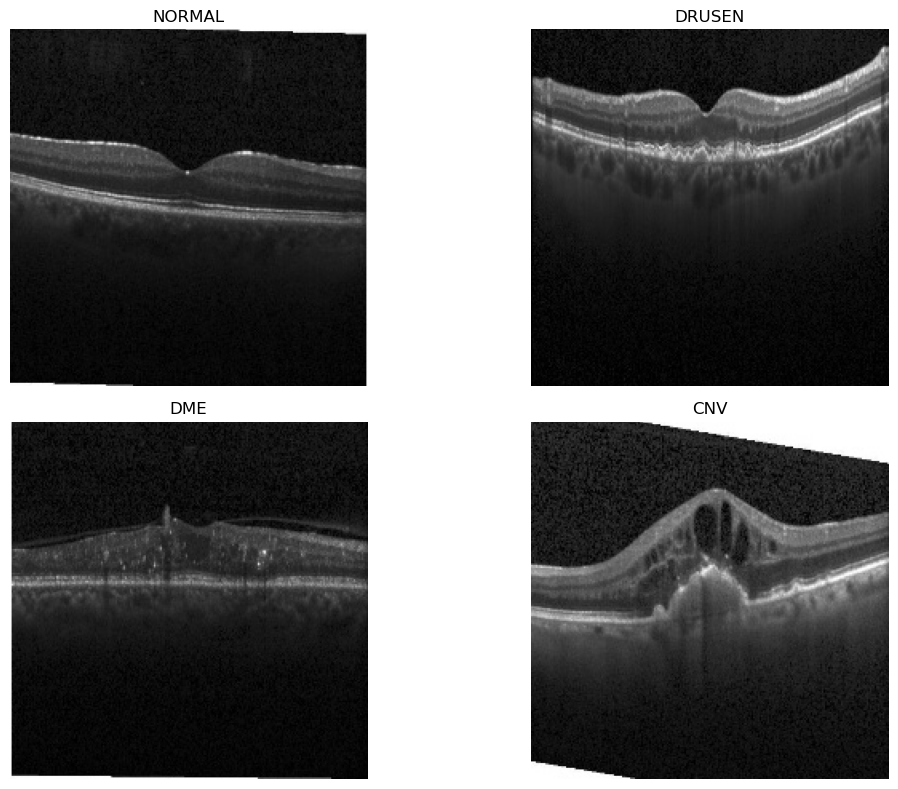

In [4]:
import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()


HER KATEGORİDEN 200'ER GÖRSEL SEÇİLDİ, 224 * 224 FORMATINDA YENİDEN BOYUTLANDIRILDI.

✅ Tüm kategoriler için BGR → RGB dönüşümü tamamlandı!


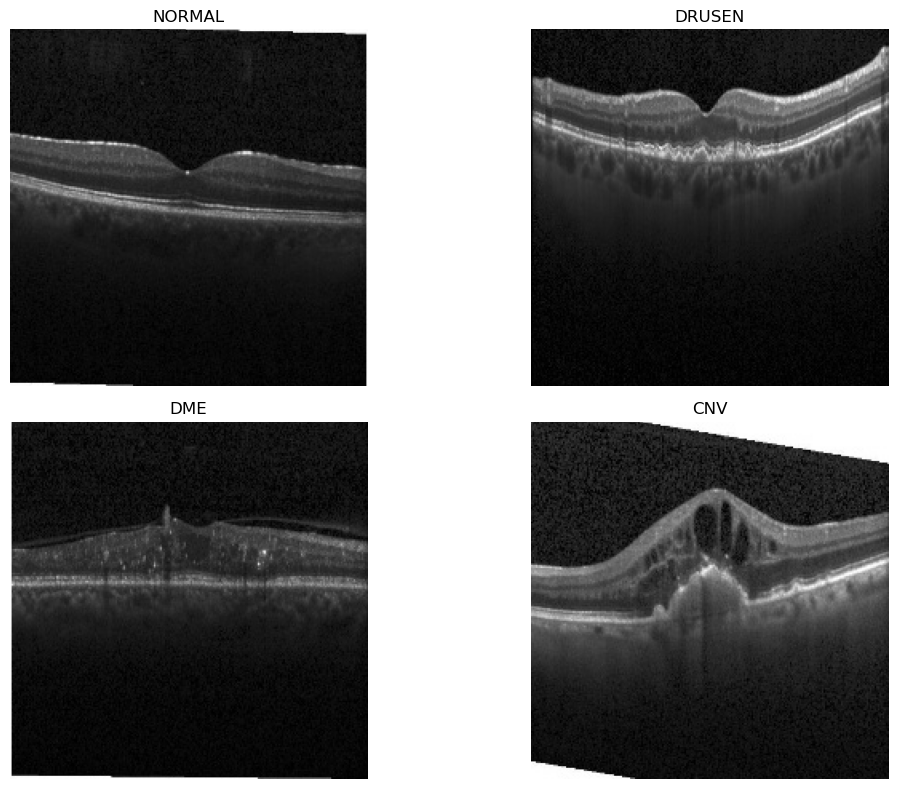

In [7]:
#####################################################
# RENK UZAYI İŞLEMİ >>>>>>> (BGR > RGB)
#####################################################

import os
import cv2

# İşlenmiş görüntülerin ana klasörü
processed_dir = 'output_processed_images'

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Her kategori için işlem yap
for category in categories:
    category_path = os.path.join(processed_dir, category)
    
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        
        # Görseli BGR olarak oku
        img = cv2.imread(file_path)
        
        if img is not None:
            # BGR'den RGB'ye dönüştür
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Aynı isimle üzerine yaz
            cv2.imwrite(file_path, rgb_img)

print("✅ Tüm kategoriler için BGR → RGB dönüşümü tamamlandı!")

import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()


RENK UZAYI İŞLEMLERİ  BGR > RGB

✅ Tüm kategoriler için RGB → Grayscale dönüşümü tamamlandı!


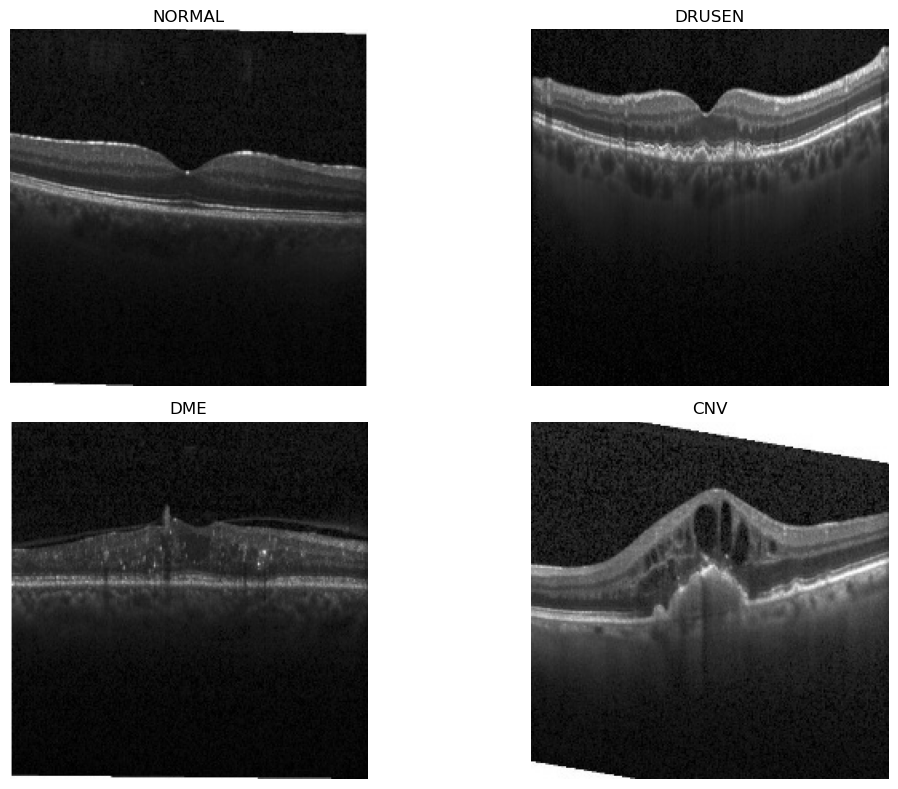

In [10]:
###############################################
#  RENK UZAYINA GÖRE İŞLEMLER    RGB >>> GRAYSCALE
###############################################
import os
import cv2

# İşlenmiş görüntülerin ana klasörü
processed_dir = 'output_processed_images'

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Her kategori için işlem yap
for category in categories:
    category_path = os.path.join(processed_dir, category)
    
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        
        # Görseli RGB olarak oku
        img = cv2.imread(file_path)
        
        if img is not None:
            # RGB'den Grayscale'e dönüştür
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            # Aynı isimle üzerine yaz
            cv2.imwrite(file_path, gray_img)

print("✅ Tüm kategoriler için RGB → Grayscale dönüşümü tamamlandı!")

import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()


RENK UZAYINA GÖRE İŞLEMLER  (RGB >> GRAYSCALE)

✅ Tüm sınıflandırılmış görsellere MORPH_GRADIENT morfolojik işlemi başarıyla uygulandı ve aynı klasörlerde kaydedildi.


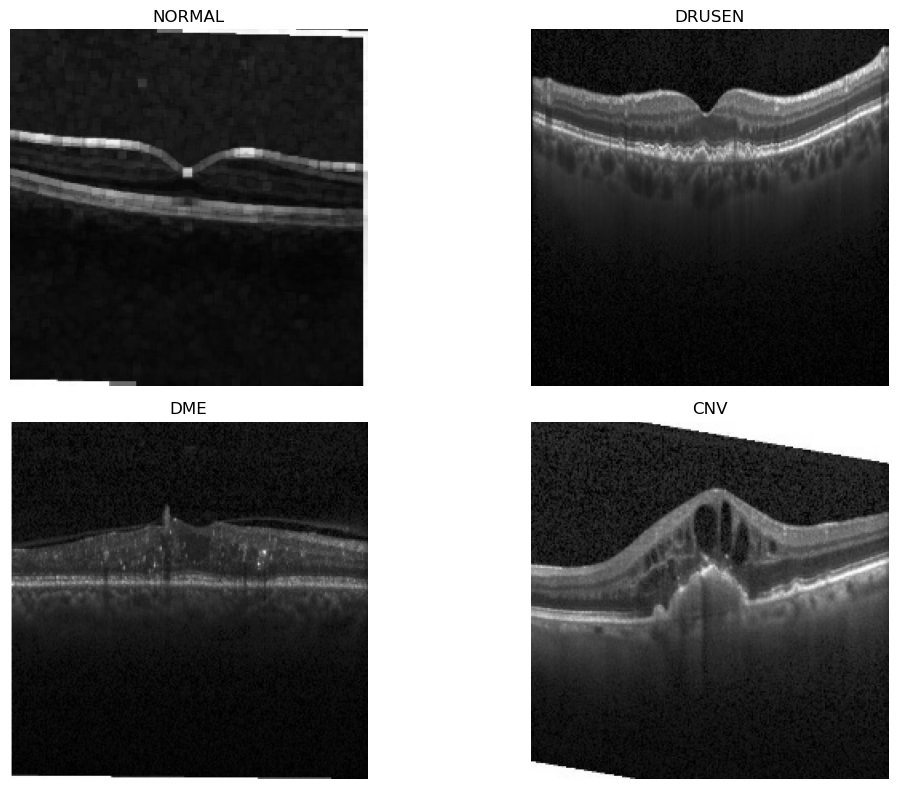

In [12]:
################################################################
# MORFOLOJİK İŞLEMLER >>>>>>>>>>>>>   MORPH_GRADIENT
################################################################
import os
import cv2

# Kaynak klasör (sınıflara göre ayrılmış görsellerin olduğu klasör)
source_dir = 'output_processed_images'

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# MORPH_GRADIENT için kernel tanımı
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Her kategori için işlemleri yap
for category in categories:
    category_path = os.path.join(source_dir, category)
    
    # Kategori klasöründeki tüm görseller için işlemleri uygula
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        
        # Görseli oku
        img = cv2.imread(img_path)
        
        if img is not None:
            # MORPH_GRADIENT işlemi uygula
            morph_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
            
            # Yeni görsel ismini belirle
            dest_path = os.path.join(category_path, f"gradient_{img_name}")
            
            # İşlenmiş görseli kaydet
            cv2.imwrite(dest_path, morph_img)

print("✅ Tüm sınıflandırılmış görsellere MORPH_GRADIENT morfolojik işlemi başarıyla uygulandı ve aynı klasörlerde kaydedildi.")





import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()




MORFOLOJİK İŞLEMLER >>>>>>>   MORPH_GRADIENT

✅ Tüm sınıflandırılmış görsellere THRESH_TOZERO_INV eşikleme işlemi uygulandı ve aynı klasörlerde kaydedildi.


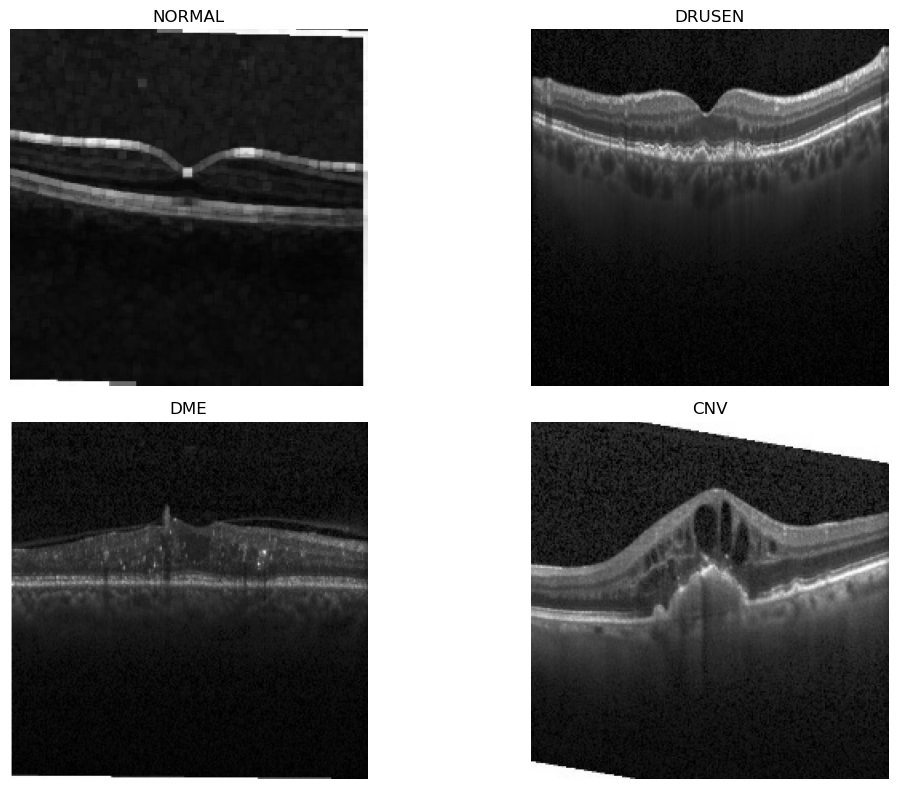

In [15]:
####################################################
# EŞİKLEME İŞLEMİ >>>>>>>>>>>>>> THRESH_TOZERO_INV
####################################################
import cv2
import os

# Kaynak klasör (sınıflara göre ayrılmış görsellerin olduğu klasör)
source_dir = 'output_processed_images'

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Her kategori için işlemleri yap
for category in categories:
    category_path = os.path.join(source_dir, category)
    
    # Kategori klasöründeki tüm görseller için işlemleri uygula
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        
        # Görseli oku
        img = cv2.imread(img_path)
        
        if img is not None:
            # Gri tonlamaya çevir
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # THRESH_TOZERO_INV eşikleme uygula
            ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_TOZERO_INV)
            
            # Sonuç görselini aynı klasöre kaydet
            dest_path = os.path.join(category_path, f"tozero_inv_{img_name}")
            cv2.imwrite(dest_path, thresh)

print("✅ Tüm sınıflandırılmış görsellere THRESH_TOZERO_INV eşikleme işlemi uygulandı ve aynı klasörlerde kaydedildi.")


import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()



EŞİKLEME İŞLEMİ >>>>>> THRESH_TOZERO_INV

Bu kod iki ana işlem yapar. İlk bölümde, her sınıftaki görseller gri tonlamaya çevrilir ve cv2.THRESH_TOZERO_INV eşikleme uygulanır. Bu yöntemle, 127’den büyük pikseller sıfırlanır, diğerleri korunur. İşlenen görseller aynı klasöre kaydedilir.

İkinci bölümde, her sınıftan bir görsel alınarak matplotlib ile görselleştirilir. Görseller RGB formatına çevrilir ve 2x2 bir düzen içinde, başlıklarıyla birlikte ekrana çizilir. Bu, uygulanan işlemin etkisini görsel olarak incelemek içindir.

In [18]:
############################################################################################
#OLUŞAN GÖRÜNTÜLERİ FARKLI BİR KLASÖRE KOPYALIYORUM DAHA SONRA BİTWİSE İŞLEMİ YAPMAK İÇİN 
############################################################################################
import os
import shutil

# Giriş ve çıkış ana klasörleri
input_dir = 'output_processed_images'
output_dir = 'output_thresh_images'

# Kategoriler
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Her kategori klasörü için ayrı ayrı işle
for category in categories:
    input_category_path = os.path.join(input_dir, category)
    output_category_path = os.path.join(output_dir, category)

    # Çıkış klasörünü oluştur (varsa geç)
    os.makedirs(output_category_path, exist_ok=True)

    # Kategori klasöründeki görselleri kopyala
    for img_name in os.listdir(input_category_path):
        src_path = os.path.join(input_category_path, img_name)
        dest_path = os.path.join(output_category_path, img_name)
        shutil.copy(src_path, dest_path)

print(f"✅ Tüm sınıflandırılmış görseller '{input_dir}' klasöründen '{output_dir}' klasörüne başarıyla kopyalandı!")



✅ Tüm sınıflandırılmış görseller 'output_processed_images' klasöründen 'output_thresh_images' klasörüne başarıyla kopyalandı!


OLUŞAN GÖRÜNTÜLERİ FARKLI BİR KLASÖRE KOPYALIYORUM DAHA SONRA BİTWİSE İŞLEMİ YAPMAK İÇİN 

✅ Kontrast arttırıldı, Sobel kenar tespiti ve bitwise işlemi başarıyla uygulandı ve sonuçlar kaydedildi.


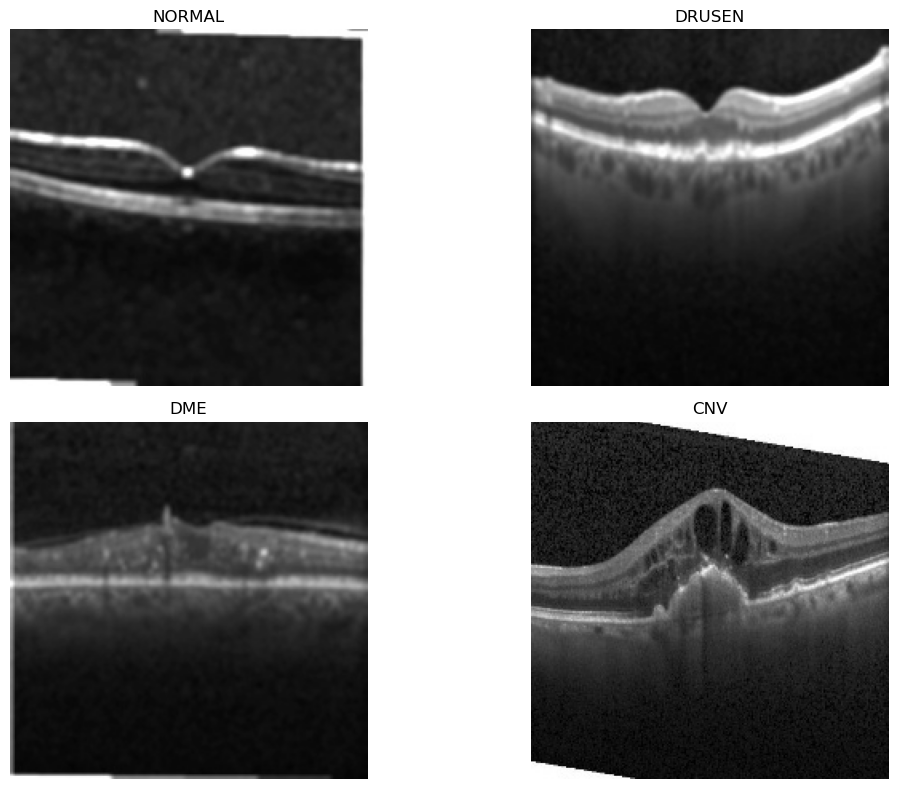

In [21]:
###################################################################
# KENAR TESPİTİ VE BİTWİSE İŞLEMİ >>>>>>>>>>>>>>>>> SOBEL, XOR

# PİKSEL DÜZEYİNDE İŞLEMLER
###################################################################
import os
import cv2
import numpy as np

# Kaynak klasör
source_dir = 'output_processed_images'
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Kontrast arttırılmış görsellerin kaydedileceği klasör
contrast_output_dir = 'output_processed_images'
os.makedirs(contrast_output_dir, exist_ok=True)

# Sobel işlemi ve bitwise işlemi için klasörler
sobel_output_dir = 'sobel_images'
os.makedirs(sobel_output_dir, exist_ok=True)

# Bitwise işlemi yapılan görsellerin kaydedileceği klasör
bitwise_output_dir = 'bitwise_images'
os.makedirs(bitwise_output_dir, exist_ok=True)

for category in categories:
    category_path = os.path.join(source_dir, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Gri tonlama
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# PİKSEL DÜZEYİBDE İŞLEMLER 

            
            # Gürültü azaltmak için Gaussian Blur uygula
            blurred = cv2.GaussianBlur(gray, (5, 5), 1.5)

            # Kontrastı artır
            contrast = cv2.convertScaleAbs(blurred, alpha=1.5, beta=0)

            # Kontrast arttırılmış görseli kaydet
            contrast_dest_path = os.path.join(contrast_output_dir, category, f"contrast_{img_name}")
            os.makedirs(os.path.dirname(contrast_dest_path), exist_ok=True)
            cv2.imwrite(contrast_dest_path, contrast)

            # Sobel operatörüyle kenar tespiti
            sobel_x = cv2.Sobel(contrast, cv2.CV_64F, 1, 0, ksize=3)  # X yönü
            sobel_y = cv2.Sobel(contrast, cv2.CV_64F, 0, 1, ksize=3)  # Y yönü

            # X ve Y yönlerindeki kenarları birleştir
            sobel_edges = cv2.magnitude(sobel_x, sobel_y)

            # Sonuçları normalize et
            sobel_edges = np.uint8(np.absolute(sobel_edges))

            # Sobel tespiti yapılmış görseli kaydet
            sobel_dest_path = os.path.join(sobel_output_dir, category, f"sobel_{img_name}")
            os.makedirs(os.path.dirname(sobel_dest_path), exist_ok=True)
            cv2.imwrite(sobel_dest_path, sobel_edges)

            # Kontrast ve Sobel yapılmış görseller arasında bitwise işlemi
            contrast_img = cv2.imread(contrast_dest_path)
            sobel_img = cv2.imread(sobel_dest_path)

            # Sobel görselini 8-bit formata dönüştür ve boyutları kontrol et
            sobel_img = cv2.cvtColor(sobel_img, cv2.COLOR_BGR2GRAY)  # Eğer renkli ise griye dönüştür
            sobel_img = np.uint8(sobel_img)  # 8-bit'e dönüştür

            # Bitwise işlemi
            bitwise_result = cv2.bitwise_and(contrast_img, contrast_img, mask=sobel_img)

            # Bitwise sonucu kaydet
            bitwise_dest_path = os.path.join(bitwise_output_dir, category, f"bitwise_{img_name}")
            os.makedirs(os.path.dirname(bitwise_dest_path), exist_ok=True)
            cv2.imwrite(bitwise_dest_path, bitwise_result)

print("✅ Kontrast arttırıldı, Sobel kenar tespiti ve bitwise işlemi başarıyla uygulandı ve sonuçlar kaydedildi.")


import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()




PİKSEL DÜZEYİNDE İŞLEMLER ------ KENAR TESPİTİ VE BİTWİSE İŞLEMİ >>>>>>>>>>>>>>>>> SOBEL, AND

Bu kod bloğu, dört farklı sınıfa ait (NORMAL, DRUSEN, DME, CNV) görseller üzerinde sırasıyla kontrast artırma, kenar tespiti (Sobel filtresi) ve bitwise AND işlemlerini uygular.

İlk olarak her görsel gri tonlamaya çevrilir ve Gaussian Blur ile yumuşatılır. Ardından kontrast artırılır ve bu haliyle kaydedilir. Sonrasında Sobel operatörü kullanılarak kenarlar tespit edilir ve kenar görselleri oluşturulur. En son olarak, kontrast artırılmış ve kenar tespiti yapılmış görseller arasında bitwise AND işlemi uygulanır; bu sayede yalnızca kenar bölgeleri ön plana çıkarılmış olur. Tüm sonuçlar, ilgili klasörlerde saklanır

In [24]:
################################################
# GELİŞTİRDİĞİM FİLTRE
################################################
import numpy as np

def pearl_filter(image):
    # 1. Logaritmik kontrast güçlendirme
    img_float = np.float32(image) + 1
    log_image = np.uint8(np.log(img_float) * 32)

    # 2. Median filtre ve Laplacian (Adaptive)
    median_filtered = cv2.medianBlur(log_image, 3)
    laplacian = cv2.Laplacian(median_filtered, cv2.CV_64F)
    laplacian_abs = cv2.convertScaleAbs(laplacian)

    # 3. PEARL özel yönlü kernel (Gabor benzeri)
    pearl_kernel = np.array([[1,  2,  0],
                             [-2, 0,  2],
                             [0, -2, -1]])
    filtered = cv2.filter2D(laplacian_abs, -1, pearl_kernel)

    # Orijinal ile harmanla
    final = cv2.addWeighted(image, 0.6, filtered, 0.4, 0)
    return final


`pearl_filter`, bir girdi görüntüsünü alarak ona bir dizi özel işlem uygular ve sonuç olarak "inci benzeri" bir görünüm elde etmeyi hedefler. İlk olarak, görüntüdeki kontrastı artırmak amacıyla logaritmik bir dönüşüm gerçekleştirilir. Ardından, gürültüyü azaltmak ve kenarları korumak için median filtresi uygulanır ve bu filtrelenmiş görüntüye kenarları belirginleştirmek için Laplacian operatörü tatbik edilir. Daha sonra, görüntüdeki belirli yönlerdeki detayları vurgulamak için özel tasarlanmış, Gabor filtrelerine benzeyen bir yönlü kernel ile bir konvolüsyon işlemi yapılır. Son olarak, bu filtrelenmiş görüntü, orijinal görüntü ile belirli ağırlıklar altında birleştirilerek nihai çıktı elde edilir. Bu işlemler silsilesi, görüntüdeki ince detayları ve parlaklık geçişlerini öne çıkararak özgün bir görsel efekt yaratmayı amaçlar.

In [26]:
# GELİŞTİRDİĞİM FİLTREYİ UYGULAMA

for category in categories:
    category_path = os.path.join(input_dir, category)

    # Kategori klasöründeki her görseli işle
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        
        # Görseli oku
        img = cv2.imread(img_path)

        if img is not None:
            # Filtreyi uygula
            filtered_img = pearl_filter(img)
            
            # Aynı isimle kaydet (orijinal dosya üzerine)
            cv2.imwrite(img_path, filtered_img)

print("🎉 PEARL filtresi tüm görsellere başarıyla uygulandı!")

🎉 PEARL filtresi tüm görsellere başarıyla uygulandı!


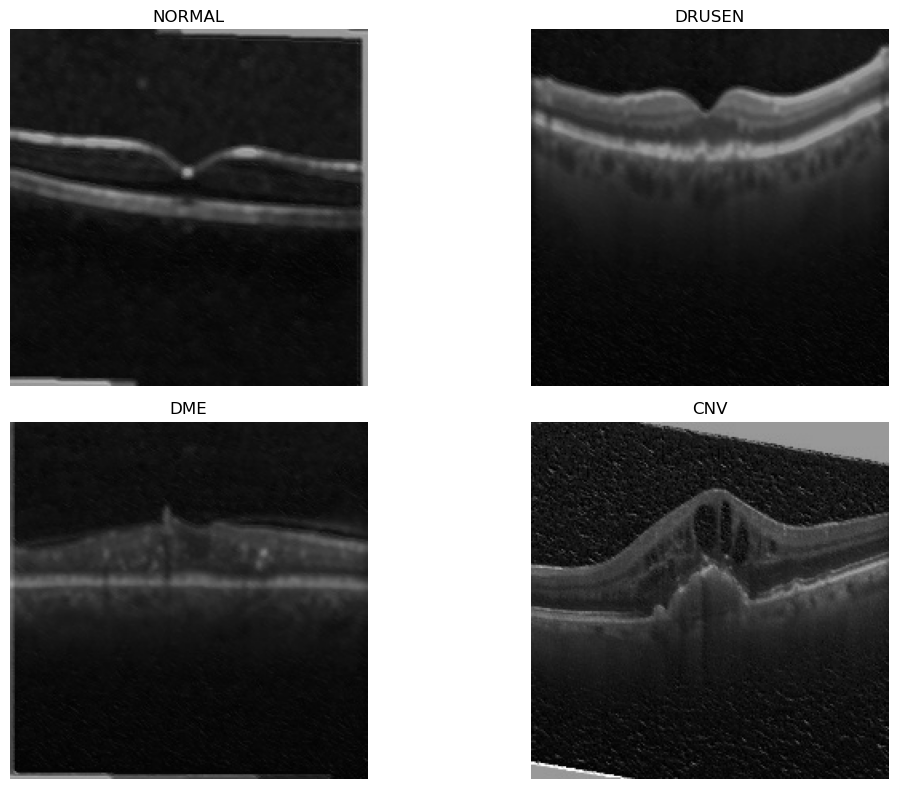

In [28]:
import matplotlib.pyplot as plt
import cv2
import os

# Kategoriler ve hedef klasör
categories = ['NORMAL', 'DRUSEN', 'DME', 'CNV']
processed_dir = 'output_processed_images'

# Görselleri görselleştir
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_path = os.path.join(processed_dir, category)
    image_files = os.listdir(category_path)
    
    if not image_files:
        print(f"{category} klasöründe görsel bulunamadı.")
        continue

    image_path = os.path.join(category_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye çevir

    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()
